In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import radon as ski_radon

In [95]:
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img1 = img1.astype(float) / 255.0
# plt.imshow(img1, cmap='gray')

img2 = cv2.imread('dog.bmp', cv2.IMREAD_GRAYSCALE)
img2 = img2.astype(float) / 255.0
# plt.imshow(img2, cmap='gray')

squares = cv2.imread('Two_Squares.png', cv2.IMREAD_GRAYSCALE)
squares = squares.astype(float) / 255.0
# plt.imshow(squares, cmap='gray')

In [86]:
def rotate_image(image, theta = 0):
    h, w = image.shape[:2]

    # theta_rad = np.radians(theta)
    # new_w = int(w * abs(np.cos(theta_rad)) + h * abs(np.sin(theta_rad)))
    # new_h = int(w * abs(np.sin(theta_rad)) + h * abs(np.cos(theta_rad)))

    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), theta, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated_image

In [68]:
def radon(image, theta_change = None):
    theta = np.arange(0, 180, theta_change)

    diagonal = np.sqrt(2) * max(image.shape)
    pad = np.ceil(diagonal - np.array(image.shape)).astype(int)
    new_center = (np.array(image.shape) + pad) // 2
    old_center = np.array(image.shape) // 2
    pad_before = new_center - old_center
    pad_width = [(pb, p - pb) for pb, p in zip(pad_before, pad)]
    image = np.pad(image, pad_width, mode='constant', constant_values=0)

    radon_image = np.zeros((image.shape[0], len(theta)))

    for i, angle in enumerate(theta):
        rotated = rotate_image(image, -angle)
        radon_image[:, i] = np.sum(rotated, axis=0)

    return radon_image

In [93]:
def run(img, theta_change = 1):
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')

    img1_radon = radon(img, theta_change)
    plt.subplot(1,3,2)
    plt.imshow(img1_radon, cmap='gray')
    plt.title('Custom Function')

    img1_radon = ski_radon(img, circle = False, theta=np.arange(0,180,theta_change))
    plt.subplot(1,3,3)
    plt.imshow(img1_radon, cmap='gray')
    plt.title('Inbuilt Function')

    plt.tight_layout()
    plt.show()

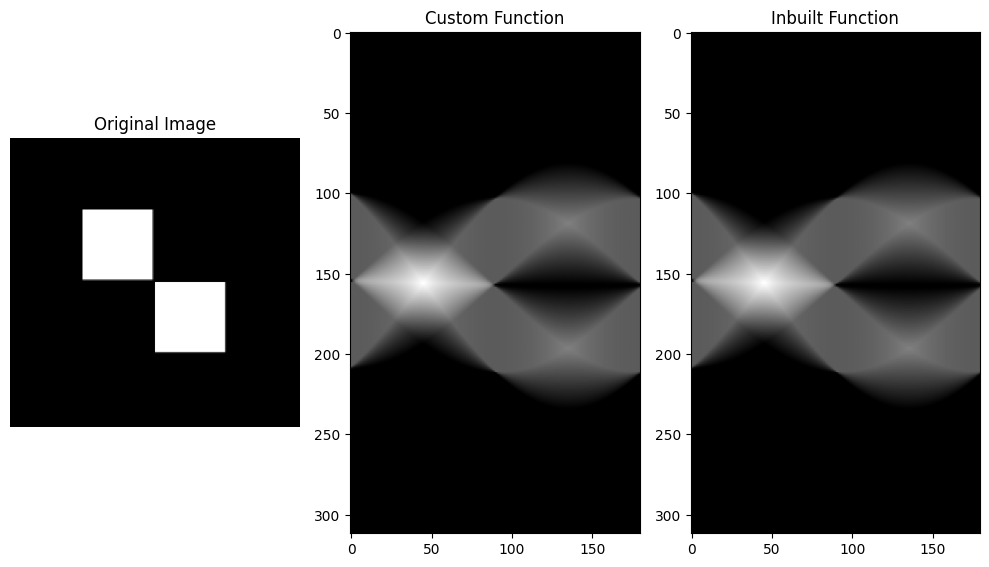

In [96]:
run(squares)

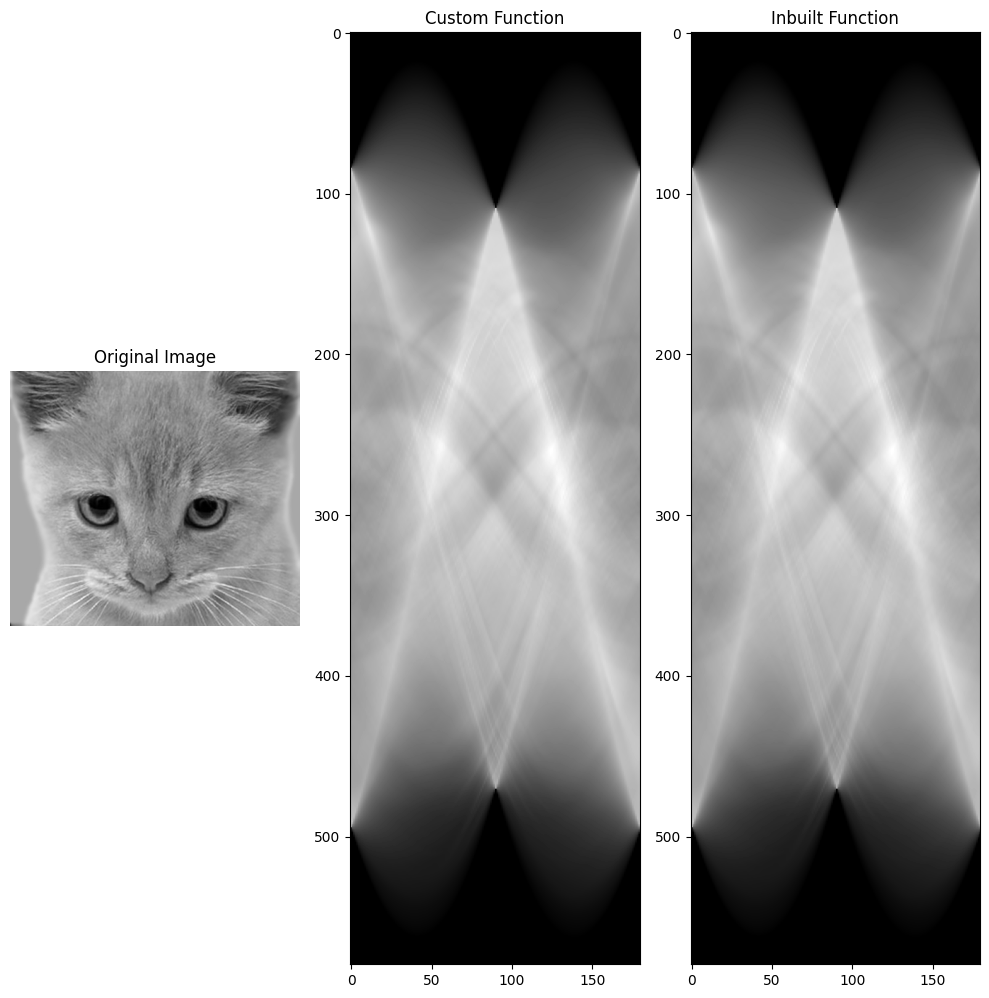

In [97]:
run(img1)

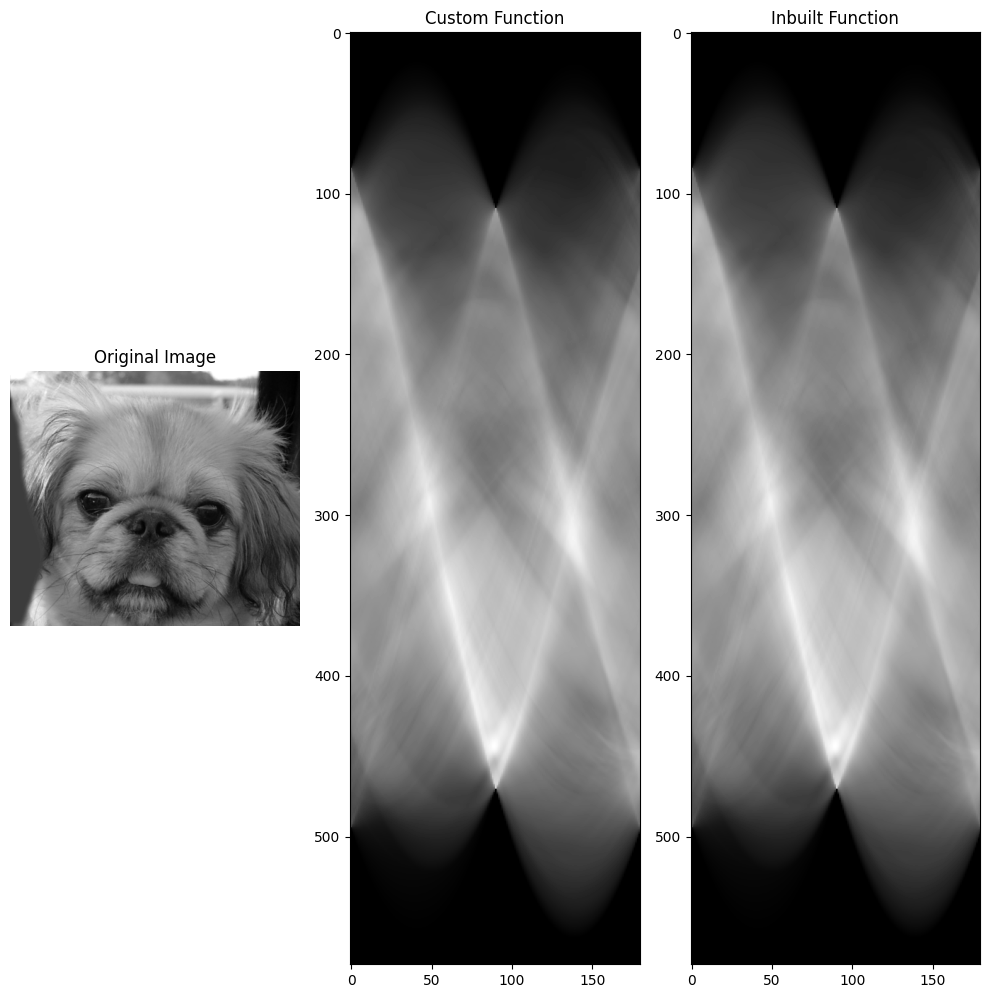

In [99]:
run(img2)

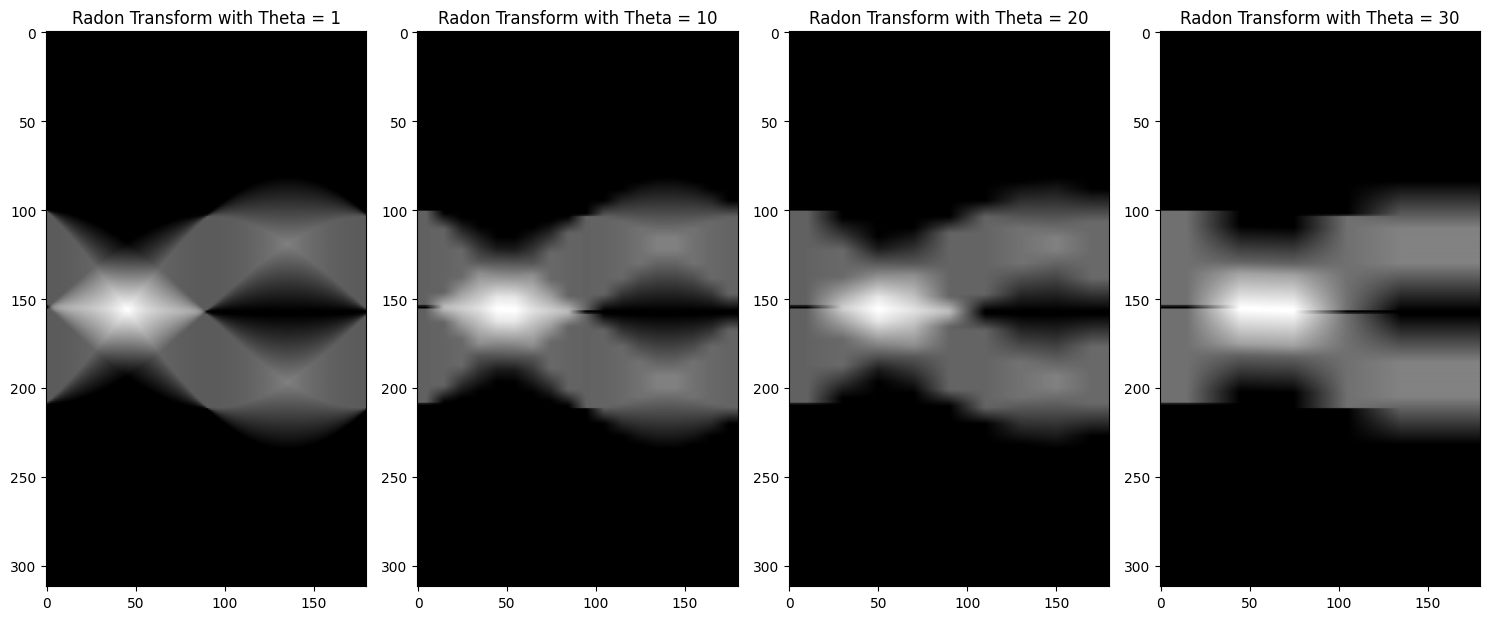

In [127]:
plt.figure(figsize=(15, 15))

for theta in [1, 10, 20, 30]:
    img1_radon = radon(squares, theta)
    img1_radon_resized = cv2.resize(img1_radon, (180, img1_radon.shape[0]))

    plt.subplot(1, 4, theta//10 + 1)
    plt.imshow(img1_radon_resized, cmap='gray')
    plt.title(f"Radon Transform with Theta = {theta}")

plt.tight_layout()
plt.show()